In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

In [3]:
def model(x):
    return x[:,0] * np.sin(x[:,0])

In [4]:
Xlin = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
ylin = model(Xlin)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(Xlin, ylin, test_size=0.025, random_state=42)

In [6]:
sigma = 0.85

In [7]:
y_noise = sigma*np.random.normal(size=y_test.size)

In [8]:
y_test += y_noise

In [9]:
kernel = ConstantKernel(1.) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=sigma**2, n_restarts_optimizer=25)

In [10]:
gpr.fit(X_test, y_test)
gpr.kernel_

7.32**2 * RBF(length_scale=1.87)

In [11]:
yhat, ystd = gpr.predict(Xlin, return_std=True)

In [12]:
t = stats.norm(loc=0., scale=1.).ppf(0.975)

In [13]:
t

1.959963984540054

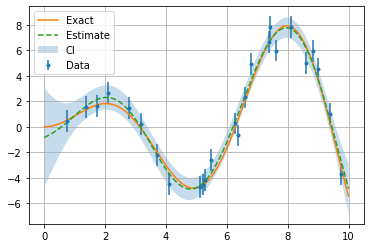

In [14]:
fig, axe = plt.subplots()
axe.errorbar(X_test, y_test, sigma, linestyle="none", marker=".", label="Data")
axe.plot(Xlin, ylin, label="Exact")
axe.plot(Xlin, yhat, linestyle="--", label="Estimate")
axe.fill_between(Xlin.ravel(), yhat + t*ystd, yhat - t*ystd, alpha=0.25, label="CI")
axe.legend()
axe.grid()